Covid dataset from Kaggle
#https://www.kaggle.com/datasets/davidbroberts/us-covid-deaths-by-state-over-time

Read dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read data file
df=pd.read_excel("Datasets-main/Coviddata.xlsx")

In [3]:
df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,2021-03-11,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,2021-03-12 15:20:13,Agree,NaN
1,2021-02-12,UT,359641,359641.0,0.0,1060,0.0,1785,1729.0,56.0,11,2.0,2021-02-13 14:50:08,Agree,Agree
2,2020-02-04,AR,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,2020-03-26 16:22:39,Not agree,Not agree
3,2020-08-22,AR,56199,NaN,NaN,547,0.0,674,NaN,NaN,11,0.0,2020-08-23 14:15:28,Not agree,Not agree
4,2020-10-22,MP,88,88.0,0.0,0,0.0,2,2.0,0.0,0,0.0,2020-10-23 13:44:31,Agree,Agree


In [4]:
df.shape
#31.7K rows and 15 columns

(31680, 15)

In [5]:
df.describe()

,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
count,3.168000e+04,1.507500e+04,15004.000000,31680.000000,27345.000000,31680.000000,15542.000000,15542.000000,31680.000000,27286.000000
mean,2.279798e+05,2.203991e+05,28950.681685,1056.385638,138.949205,4636.650505,4941.011839,563.480054,18.838889,1.788133
std,4.419667e+05,2.756124e+05,47160.501752,2517.129472,521.281838,8247.632033,5981.809139,974.139789,48.721365,32.089807
min,0.000000e+00,0.000000e+00,0.000000,-33355.000000,-33864.000000,0.000000,0.000000,0.000000,-1453.000000,-2594.000000
25%,2.010750e+03,1.751150e+04,81.000000,17.000000,0.000000,45.000000,500.000000,1.000000,0.000000,0.000000
50%,5.559850e+04,1.013130e+05,4882.000000,274.000000,1.000000,1157.000000,2373.000000,158.000000,4.000000,0.000000
75%,2.673418e+05,3.289640e+05,35260.250000,1033.000000,100.000000,5829.250000,6958.750000,664.750000,18.000000,1.000000
max,3.713944e+06,1.392552e+06,231453.000000,60080.000000,18156.000000,63141.000000,28333.000000,5096.000000,1644.000000,2919.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31680 entries, 0 to 31679
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   submission_date  31680 non-null  datetime64[ns]
 1   state            31680 non-null  object        
 2   tot_cases        31680 non-null  int64         
 3   conf_cases       15075 non-null  float64       
 4   prob_cases       15004 non-null  float64       
 5   new_case         31680 non-null  int64         
 6   pnew_case        27345 non-null  float64       
 7   tot_death        31680 non-null  int64         
 8   conf_death       15542 non-null  float64       
 9   prob_death       15542 non-null  float64       
 10  new_death        31680 non-null  int64         
 11  pnew_death       27286 non-null  float64       
 12  created_at       31680 non-null  datetime64[ns]
 13  consent_cases    25872 non-null  object        
 14  consent_deaths   26928 non-null  objec

understanding the dataset

In [9]:
#review columns with nulls
print(df.isna().sum(axis=0))

submission_date        0
state                  0
tot_cases              0
conf_cases         16605
prob_cases         16676
new_case               0
pnew_case           4335
tot_death              0
conf_death         16138
prob_death         16138
new_death              0
pnew_death          4394
created_at             0
consent_cases       5808
consent_deaths      4752
dtype: int64


In [10]:
print ("From date: ",df['submission_date'].min(), "To date: "  ,df['submission_date'].max())
#Date ranges are from Jan 2020 to July 2021

From date:  2020-01-22 00:00:00 To date:  2021-07-02 00:00:00


In [11]:
#Total number of cases:
print("Total number of cases in the dataset across states",df["tot_cases"].sum()/1000000," M")

Total number of cases in the dataset across states 7222.398524  M


In [12]:
#import datetime
df['submission_year']= pd.DatetimeIndex(df['submission_date']).year

In [13]:
df['submission_month']= pd.DatetimeIndex(df['submission_date']).month

In [14]:
df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,submission_year,submission_month
0,2021-03-11,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,2021-03-12 15:20:13,Agree,NaN,2021,3
1,2021-02-12,UT,359641,359641.0,0.0,1060,0.0,1785,1729.0,56.0,11,2.0,2021-02-13 14:50:08,Agree,Agree,2021,2
2,2020-02-04,AR,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,2020-03-26 16:22:39,Not agree,Not agree,2020,2
3,2020-08-22,AR,56199,NaN,NaN,547,0.0,674,NaN,NaN,11,0.0,2020-08-23 14:15:28,Not agree,Not agree,2020,8
4,2020-10-22,MP,88,88.0,0.0,0,0.0,2,2.0,0.0,0,0.0,2020-10-23 13:44:31,Agree,Agree,2020,10


<AxesSubplot:xlabel='submission_year,submission_month'>

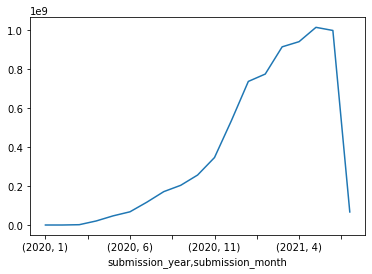

In [15]:
df_summary=df.groupby(['submission_year','submission_month'])['tot_cases'].sum()
df_summary.plot()

<AxesSubplot:xlabel='submission_year,submission_month'>

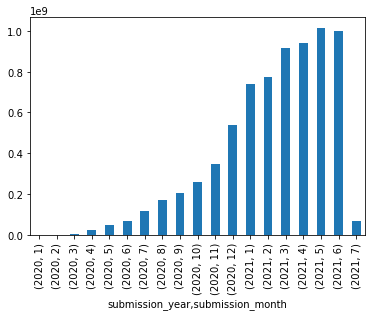

In [16]:
df_summary.plot.bar()

In [19]:
#unique values in state column
print(df["state"].unique())

print("total number of states in dataset:" , len(pd.unique(df['state'])))


['KS' 'UT' 'AR' 'MP' 'IA' 'SD' 'HI' 'MA' 'PR' 'OH' 'NM' 'TX' 'PW' 'GA'
 'NY' 'NYC' 'AS' 'CO' 'WV' 'RMI' 'OK' 'TN' 'AK' 'PA' 'FL' 'NE' 'LA' 'DC'
 'NJ' 'ME' 'KY' 'ND' 'GU' 'IN' 'RI' 'MI' 'CT' 'AZ' 'NV' 'SC' 'CA' 'MD'
 'OR' 'DE' 'WI' 'NC' 'VT' 'ID' 'MO' 'VI' 'IL' 'WA' 'NH' 'MT' 'AL' 'MS'
 'MN' 'FSM' 'VA' 'WY']
total number of states in dataset: 60


In [17]:
df["state"].value_counts()

#each state has same number of rows

GA     528
WY     528
NYC    528
ND     528
VA     528
MD     528
MI     528
TN     528
SD     528
OH     528
OK     528
WV     528
UT     528
WI     528
FSM    528
WA     528
MS     528
ME     528
DE     528
PR     528
VT     528
CA     528
PW     528
IN     528
PA     528
AK     528
RMI    528
CT     528
TX     528
AZ     528
NE     528
NY     528
ID     528
AL     528
VI     528
NM     528
RI     528
KS     528
CO     528
MP     528
HI     528
GU     528
IL     528
SC     528
MT     528
KY     528
NV     528
MN     528
MO     528
AS     528
DC     528
FL     528
NC     528
NJ     528
LA     528
MA     528
NH     528
IA     528
OR     528
AR     528
Name: state, dtype: int64

In [20]:
#sum the rows by state
df.groupby(['state'])['tot_cases'].sum()

state
AK      13741441
AL     129750155
AR      77049761
AS           452
AZ     196629958
CA     826063441
CO     108864943
CT      72421098
DC      11551197
DE      22552847
FL     500683179
FSM          176
GA     253019671
GU       2055460
HI       7622221
IA      86545835
ID      43097894
IL     310279889
IN     160487951
KS      69765091
KY      96301841
LA     114855398
MA     149789400
MD     103871980
ME      11187650
MI     211385594
MN     126614163
MO     136967494
MP         44210
MS      76137488
MT      23893789
NC     211961811
ND      25721952
NE      51136250
NH      17807566
NJ     218723239
NM      44085427
NV      73302767
NY     240991958
NYC    213257258
OH     227734802
OK     101989850
OR      39394538
PA     232910131
PR      28911490
PW            56
RI      32133149
RMI          939
SC     128184123
SD      28546486
TN     192963088
TX     647498583
UT      89124409
VA     142417903
VI        756263
VT       3676604
WA      89127546
WI     153653796
WV      

<AxesSubplot:xlabel='state'>

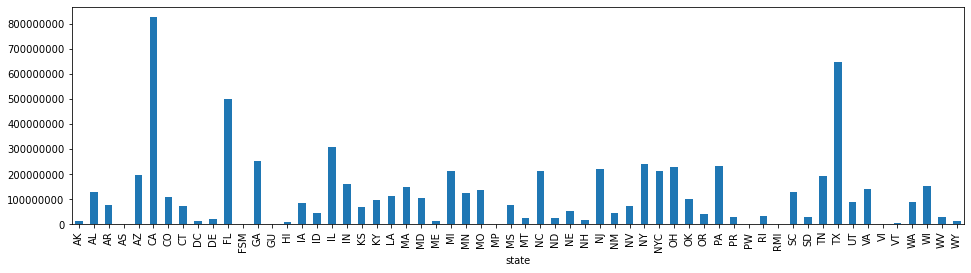

In [23]:
#total cases by states
plt.figure(figsize=(16,4)) # increase fig size to avoid overlaps in labels
plt.ticklabel_format(style='plain') #disable the scientific notation on the y-axis
df.groupby(['state'])['tot_cases'].sum().plot.bar(rot=90)

#CA has highest cases followed bu TX

In [24]:
df_clean=df[(df['tot_cases']!=0) & (df['consent_cases']=='Agree') & (df['consent_deaths']=='Agree')]

In [25]:
df_clean.shape

(13186, 17)

In [26]:
df_clean.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,submission_year,submission_month
1,2021-02-12,UT,359641,359641.0,0.0,1060,0.0,1785,1729.0,56.0,11,2.0,2021-02-13 14:50:08,Agree,Agree,2021,2
4,2020-10-22,MP,88,88.0,0.0,0,0.0,2,2.0,0.0,0,0.0,2020-10-23 13:44:31,Agree,Agree,2020,10
8,2021-05-22,MA,704796,659246.0,45550.0,451,46.0,17818,17458.0,360.0,5,0.0,2021-05-23 13:37:59,Agree,Agree,2021,5
9,2021-03-14,PR,102995,94790.0,8205.0,193,45.0,2080,1769.0,311.0,3,0.0,2021-03-15 14:03:45,Agree,Agree,2021,3
10,2020-10-01,MP,73,73.0,0.0,3,0.0,2,2.0,0.0,0,0.0,2020-10-02 13:40:08,Agree,Agree,2020,10


<ipython-input-23-0c384f5bcc24>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_clean.groupby(['state'])['tot_death','tot_cases'].sum().plot.bar(rot=90, subplots=True)


array([<AxesSubplot:title={'center':'tot_death'}, xlabel='state'>,
       <AxesSubplot:title={'center':'tot_cases'}, xlabel='state'>],
      dtype=object)

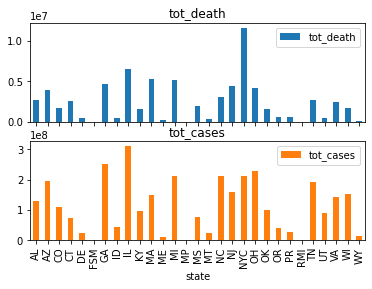

In [23]:
df_clean.groupby(['state'])['tot_death','tot_cases'].sum().plot.bar(rot=90, subplots=True)


In [35]:
df_clean2=df_clean.groupby(['state'])['tot_death','tot_cases'].sum()
df_clean2['percent death']=(df_clean2['tot_death']/df_clean2['tot_cases'].sum())*100

<ipython-input-35-42034743439a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_clean2=df_clean.groupby(['state'])['tot_death','tot_cases'].sum()


In [36]:
df_clean2

,tot_death,tot_cases,percent death
state,,,
AL,2703950,129750155,0.082559
AZ,3944388,196629958,0.120433
CO,1653476,108864943,0.050485
CT,2530328,72421098,0.077258
DE,412558,22552847,0.012597
FSM,0,176,0.000000
GA,4693749,253019671,0.143313
ID,460415,43097894,0.014058
IL,6462090,310279889,0.197306


In [37]:
df_clean2.sort_values(by=['percent death'],ascending=False,inplace=True)
df_clean2

,tot_death,tot_cases,percent death
state,,,
NYC,11623862,213257258,0.354909
IL,6462090,310279889,0.197306
MA,5296976,149789400,0.161732
MI,5206471,211385594,0.158968
GA,4693749,253019671,0.143313
NJ,4408044,158983776,0.134590
OH,4165348,227734802,0.127180
AZ,3944388,196629958,0.120433
NC,3022559,211961811,0.092287


In [38]:
df_clean2=df_clean2.style.format({'percent death': "{:.2%}"})


In [39]:
df_clean2


,tot_death,tot_cases,percent death
state,,,
NYC,11623862,213257258,35.49%
IL,6462090,310279889,19.73%
MA,5296976,149789400,16.17%
MI,5206471,211385594,15.90%
GA,4693749,253019671,14.33%
NJ,4408044,158983776,13.46%
OH,4165348,227734802,12.72%
AZ,3944388,196629958,12.04%
NC,3022559,211961811,9.23%
